# Comparing Machine Learning Techniques Using Pipelines - Lab

## Introduction

In this lab, you'lll use a Dataset created by Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data).

The description of the data set is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to our product line.

A consistent analysis of the performance of our products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of our product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights Otto Group can generate about their product range.

In this lab, you'll use a data set containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product


## Objectives

You will be able to:
- Compare different classification techniques
- Construct pipelines in scikit-learn
- Use pipelines in combination with GridSearchCV

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. create a baseline model
4. create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

The data is stored in "otto_group.csv".

Things to do here:
- Check for NAs
- Check the distributions
- Check how many inputs there are
- ...

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module05\Section_39\dsc-pipelines-lab-online-ds-pt-051319

19/11/2019  14:40    <DIR>          .
19/11/2019  14:40    <DIR>          ..
19/11/2019  14:09                69 .gitignore
19/11/2019  14:12    <DIR>          .ipynb_checkpoints
19/11/2019  14:09                96 .learn
19/11/2019  14:09             1,849 CONTRIBUTING.md
19/11/2019  14:40           748,248 index.ipynb
19/11/2019  14:09    <DIR>          index_files
19/11/2019  14:09             1,371 LICENSE.md
19/11/2019  14:09        12,495,266 otto_group.csv
19/11/2019  14:09             6,497 README.md
               7 File(s)     13,253,396 bytes
               4 Dir(s)  52,615,348,224 bytes free


In [5]:
# Your code here
df = pd.read_csv('otto_group.csv')
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [7]:
for x in df.columns[:-1]:
    print(x)

id
feat_1
feat_2
feat_3
feat_4
feat_5
feat_6
feat_7
feat_8
feat_9
feat_10
feat_11
feat_12
feat_13
feat_14
feat_15
feat_16
feat_17
feat_18
feat_19
feat_20
feat_21
feat_22
feat_23
feat_24
feat_25
feat_26
feat_27
feat_28
feat_29
feat_30
feat_31
feat_32
feat_33
feat_34
feat_35
feat_36
feat_37
feat_38
feat_39
feat_40
feat_41
feat_42
feat_43
feat_44
feat_45
feat_46
feat_47
feat_48
feat_49
feat_50
feat_51
feat_52
feat_53
feat_54
feat_55
feat_56
feat_57
feat_58
feat_59
feat_60
feat_61
feat_62
feat_63
feat_64
feat_65
feat_66
feat_67
feat_68
feat_69
feat_70
feat_71
feat_72
feat_73
feat_74
feat_75
feat_76
feat_77
feat_78
feat_79
feat_80
feat_81
feat_82
feat_83
feat_84
feat_85
feat_86
feat_87
feat_88
feat_89
feat_90
feat_91
feat_92
feat_93


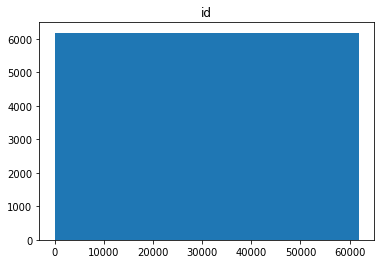

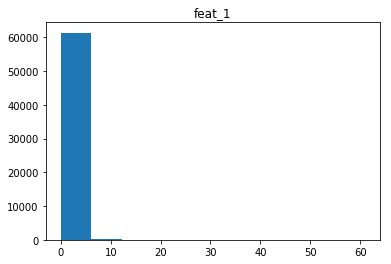

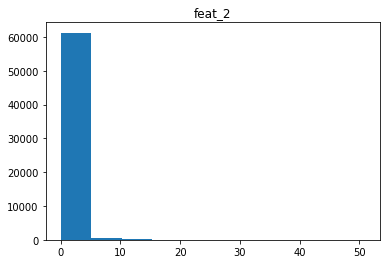

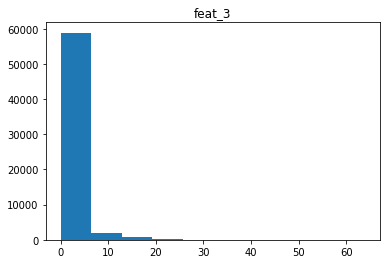

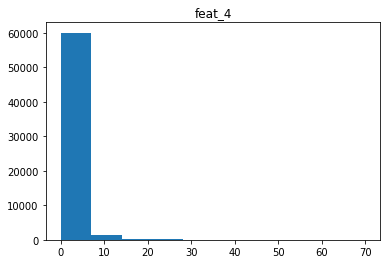

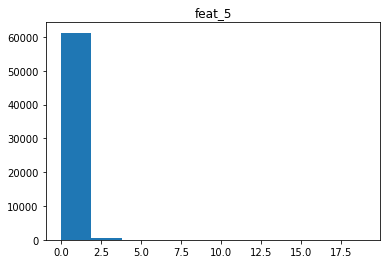

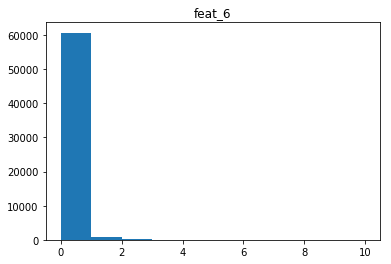

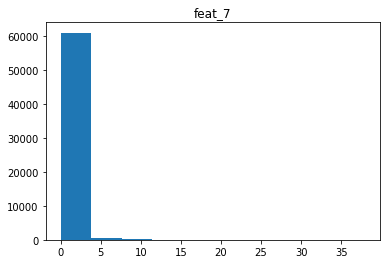

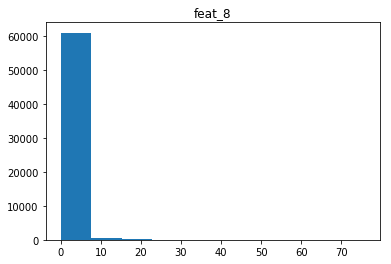

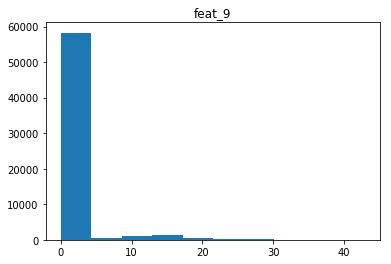

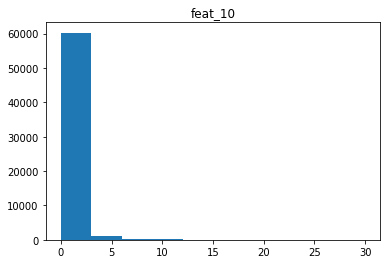

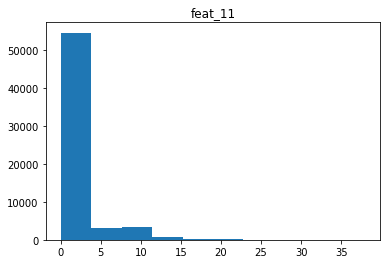

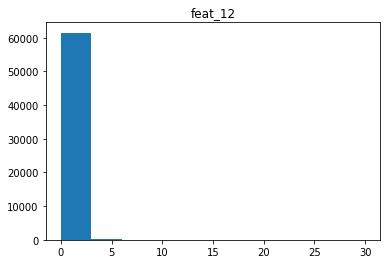

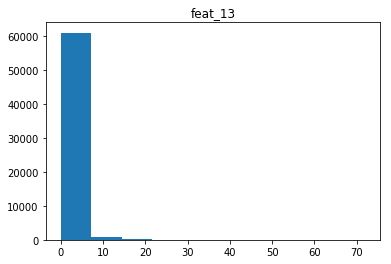

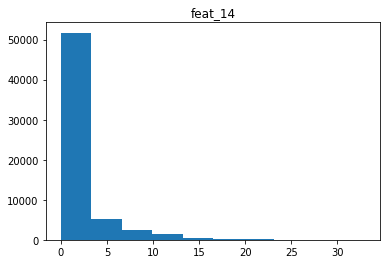

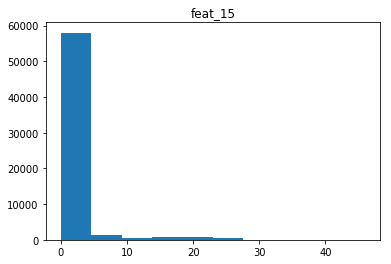

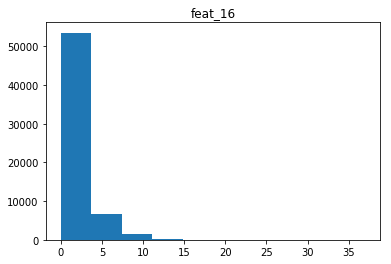

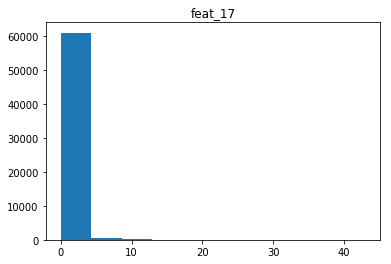

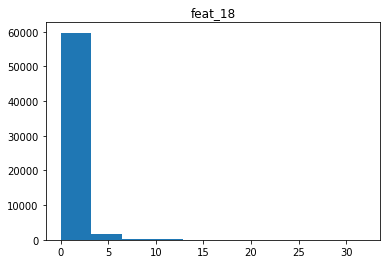

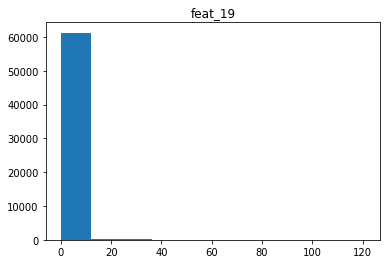

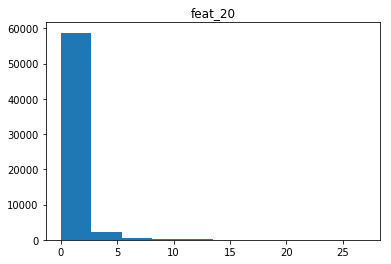

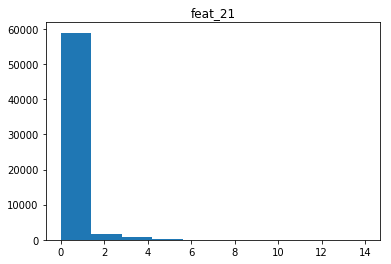

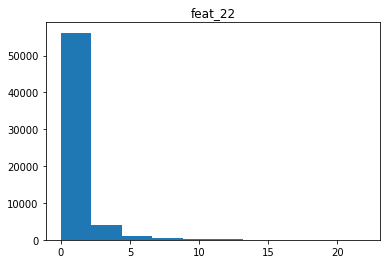

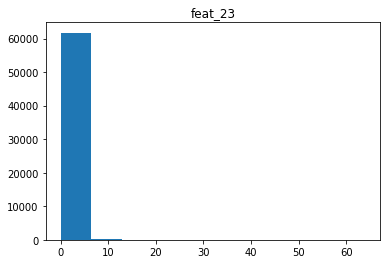

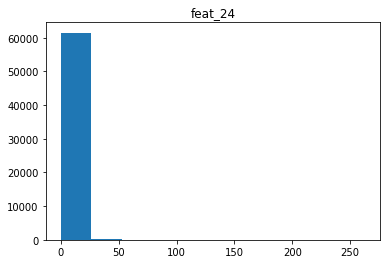

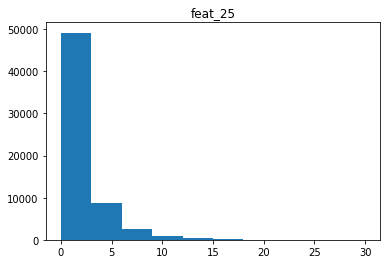

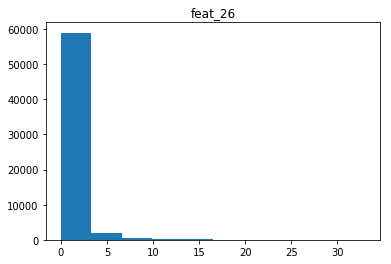

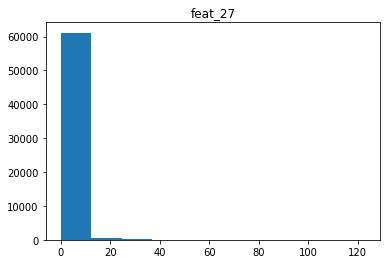

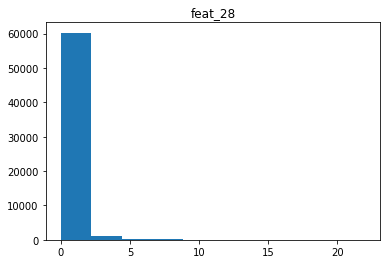

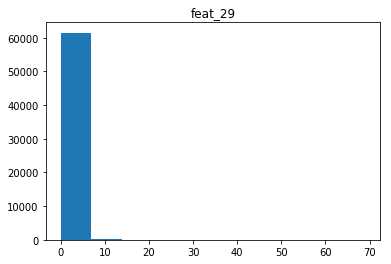

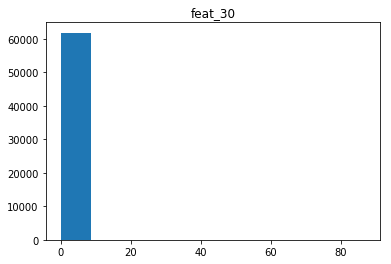

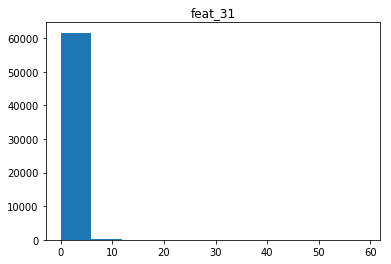

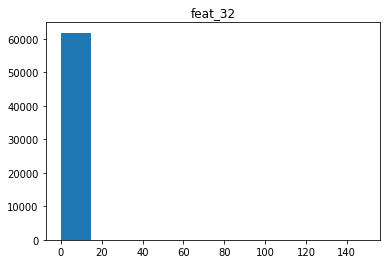

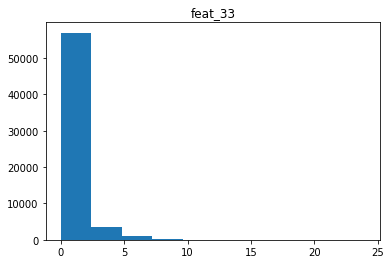

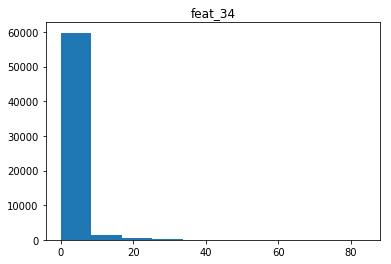

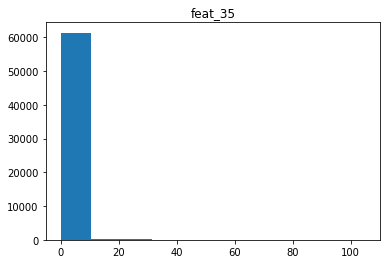

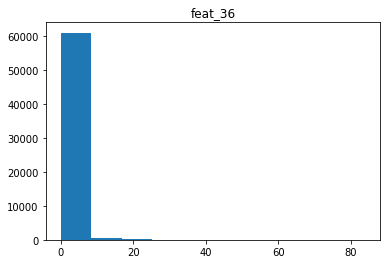

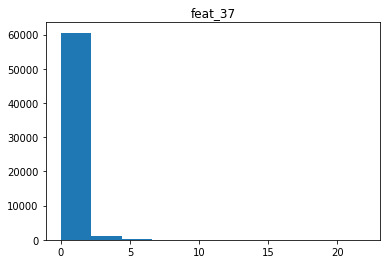

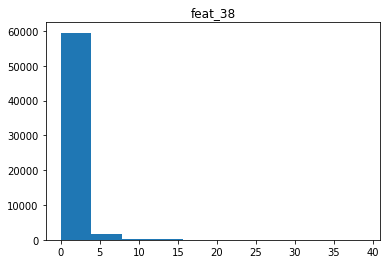

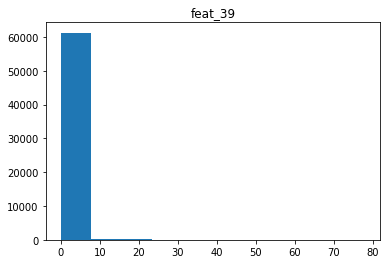

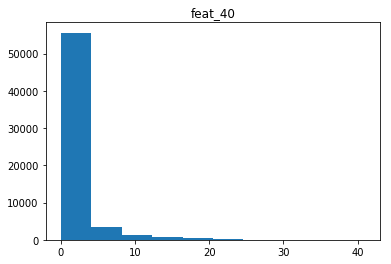

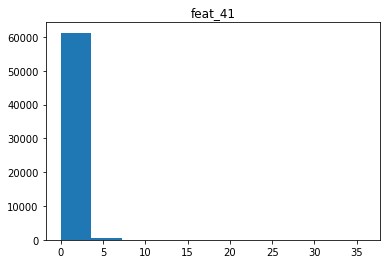

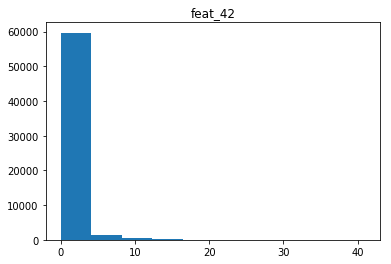

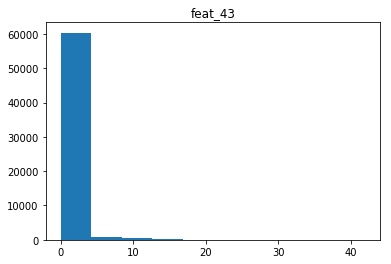

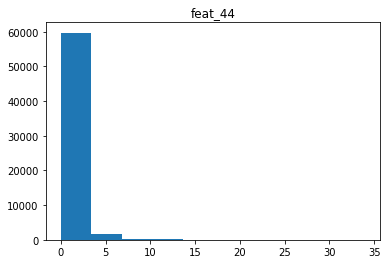

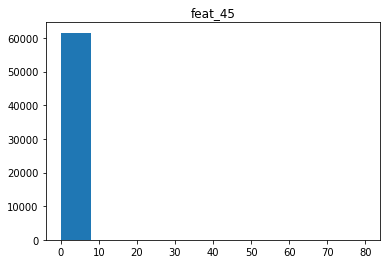

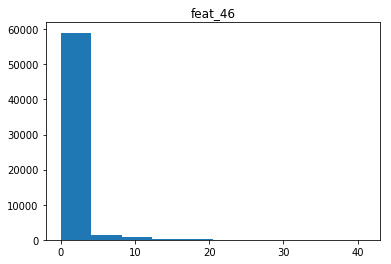

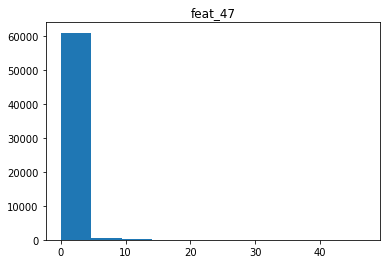

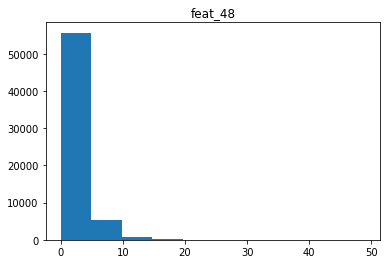

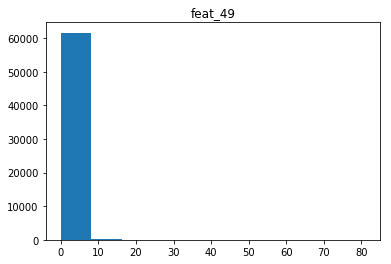

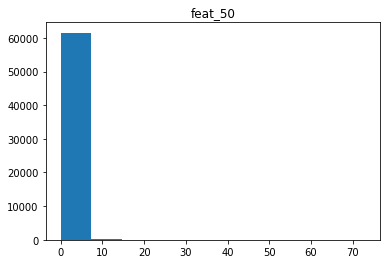

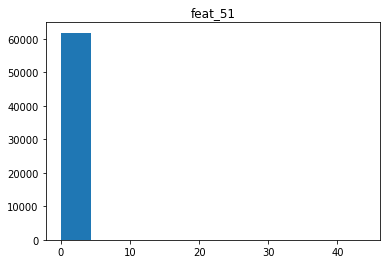

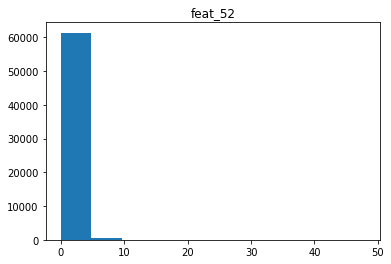

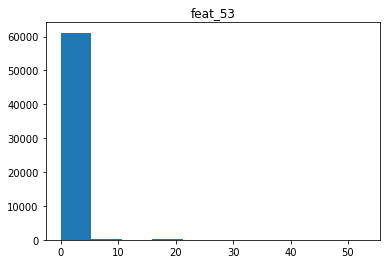

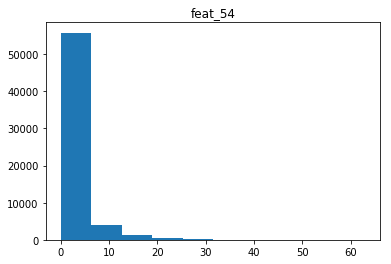

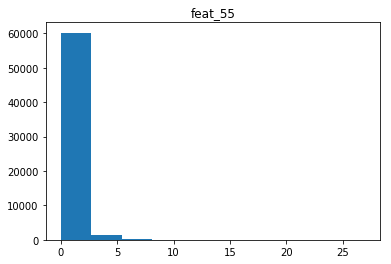

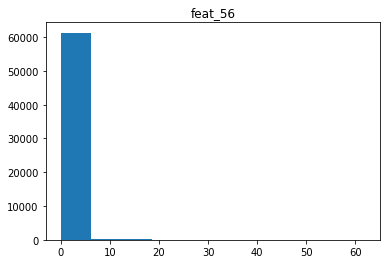

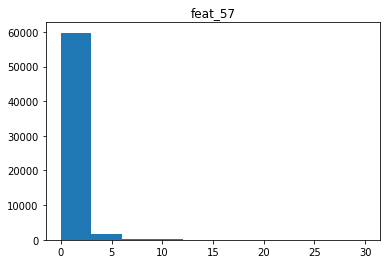

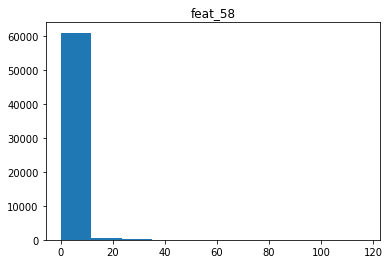

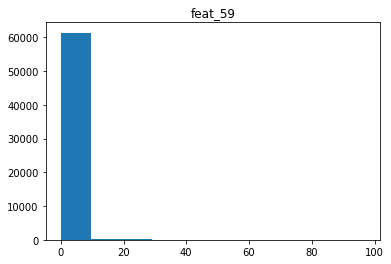

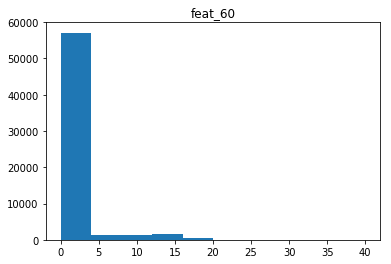

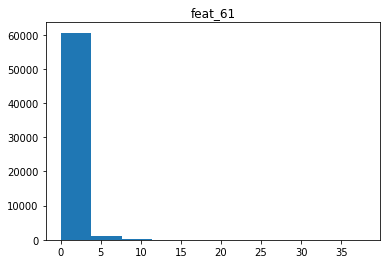

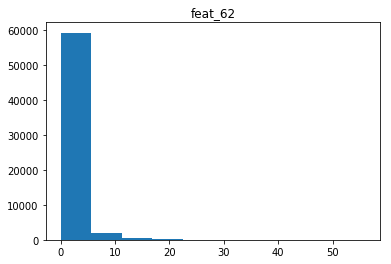

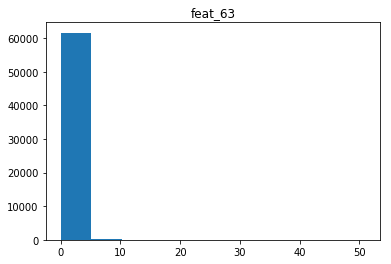

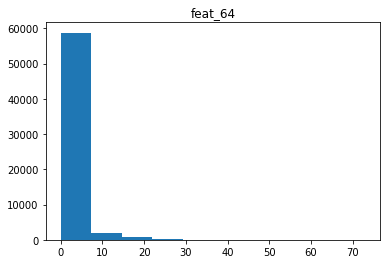

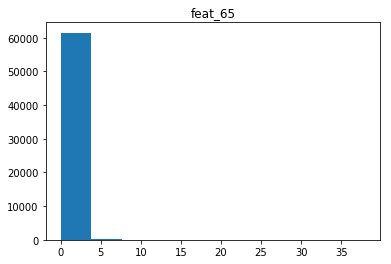

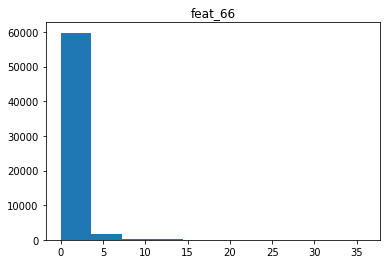

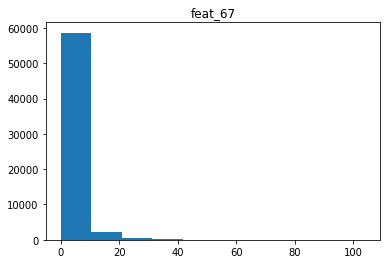

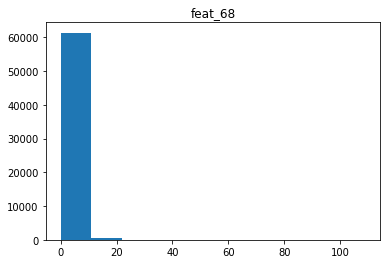

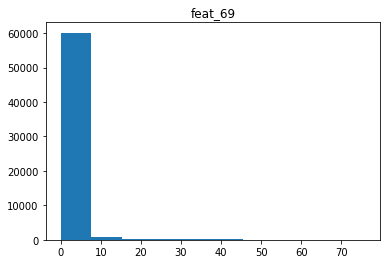

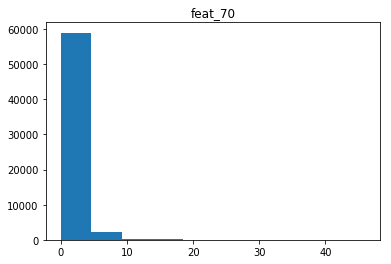

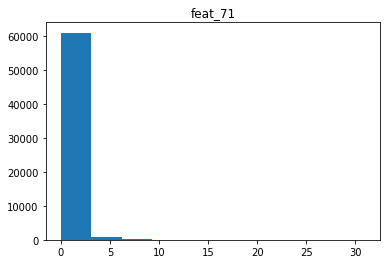

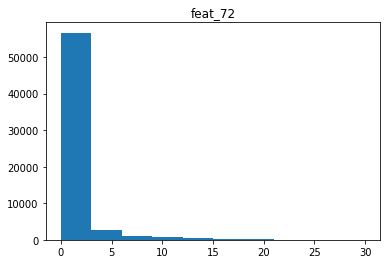

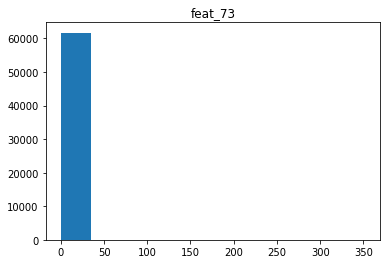

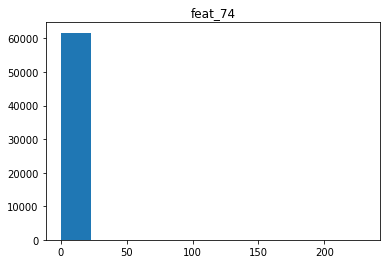

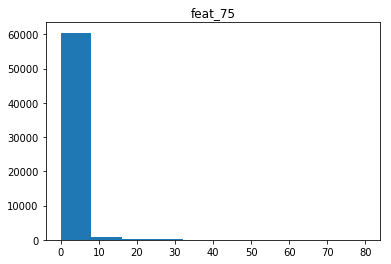

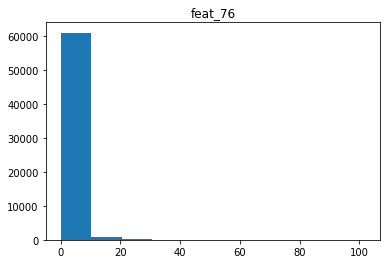

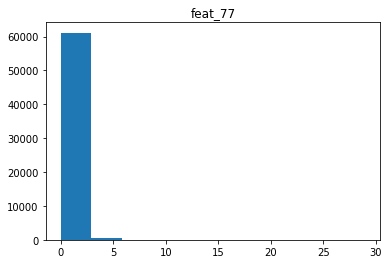

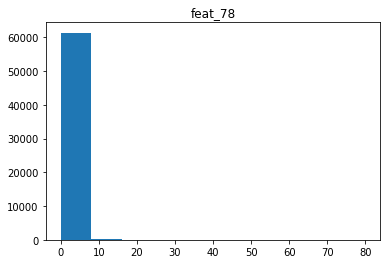

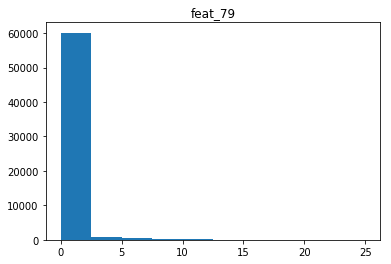

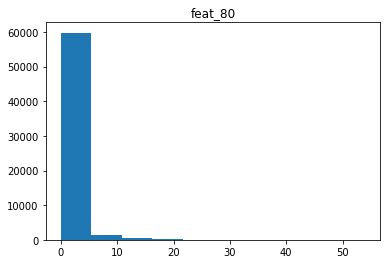

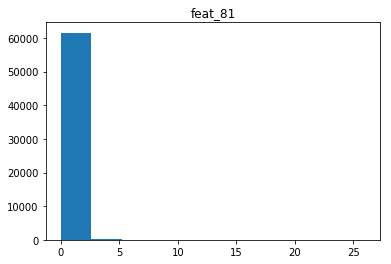

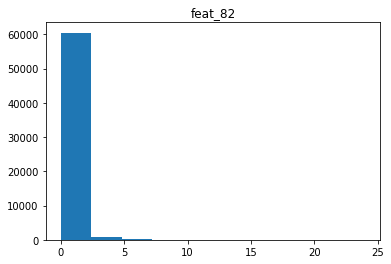

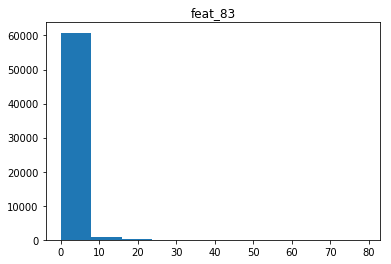

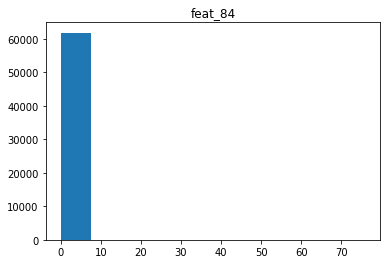

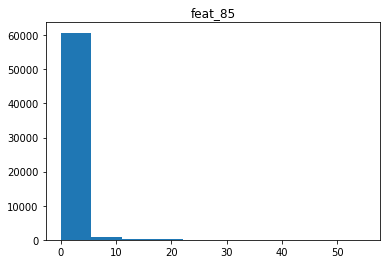

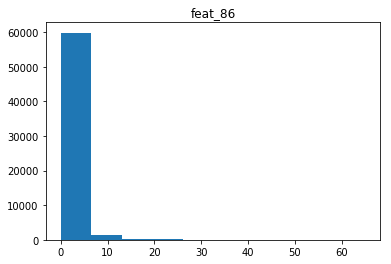

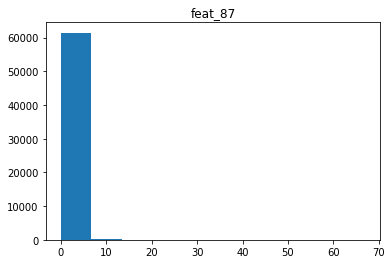

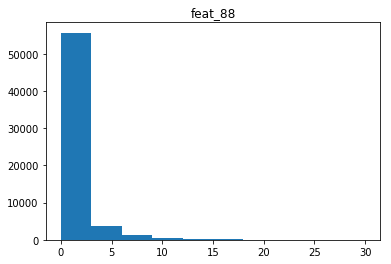

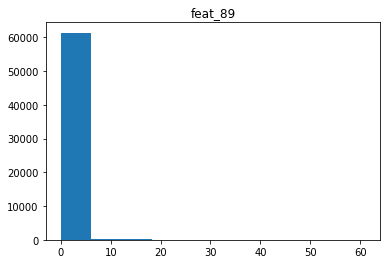

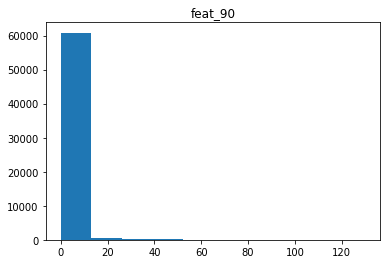

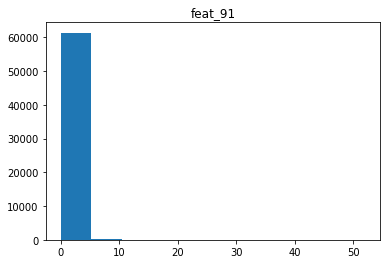

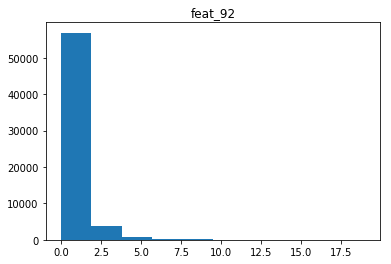

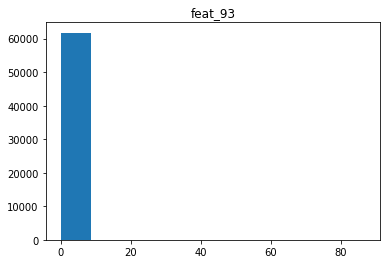

In [9]:
for x in df.columns[:-1]:
    plt.hist(df[x])
    plt.title(x)
    plt.show()

In [7]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [8]:
df.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    0
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    0
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    0
feat_23    0
feat_24    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
          ..
feat_65    0
feat_66    0
feat_67    0
feat_68    0
feat_69    0
feat_70    0
feat_71    0
feat_72    0
feat_73    0
feat_74    0
feat_75    0
feat_76    0
feat_77    0
feat_78    0
feat_79    0
feat_80    0
feat_81    0
feat_82    0
feat_83    0
feat_84    0
feat_85    0
feat_86    0
feat_87    0
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

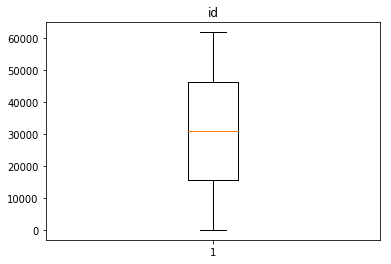

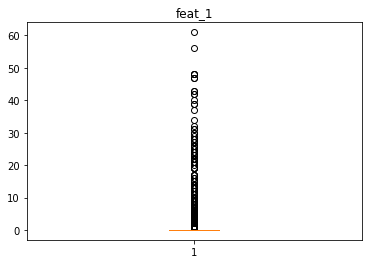

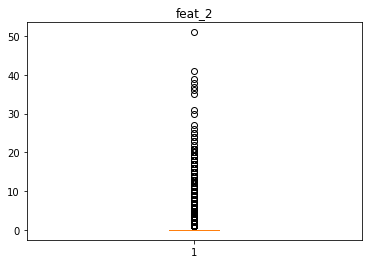

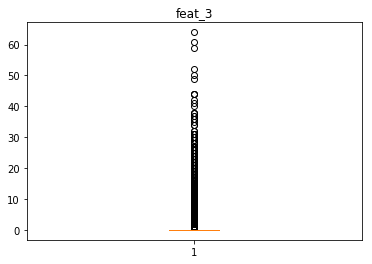

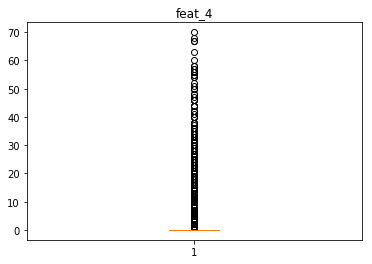

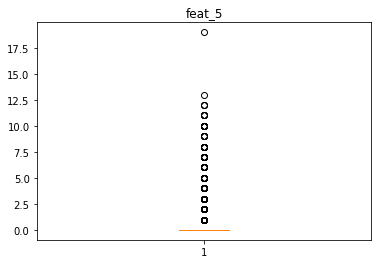

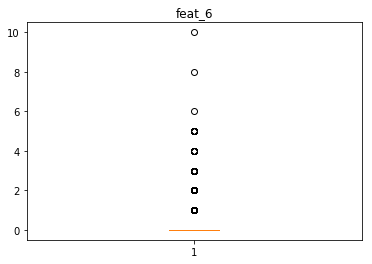

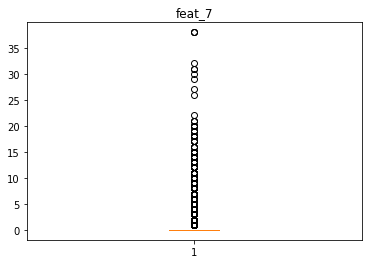

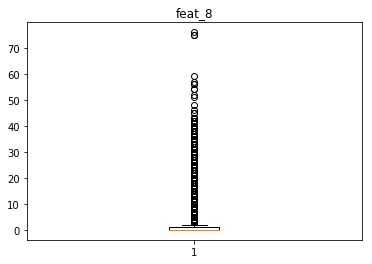

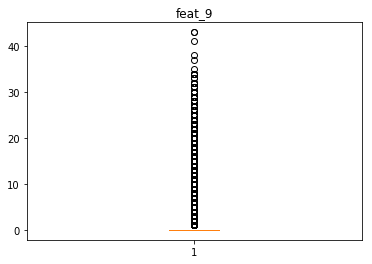

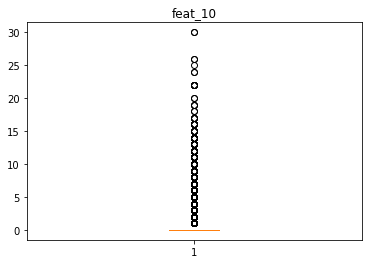

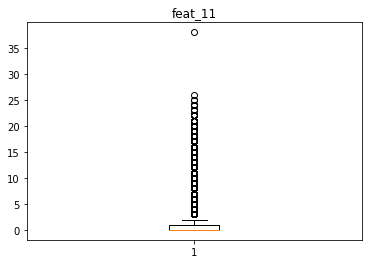

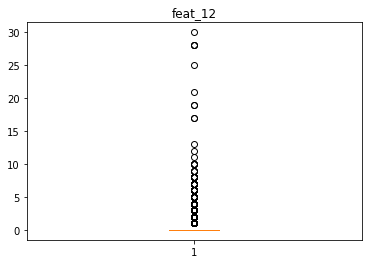

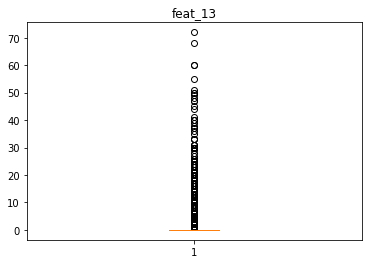

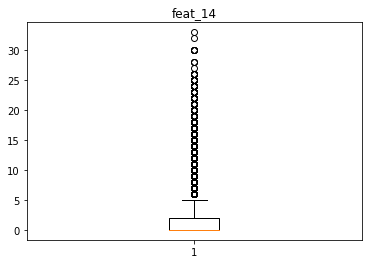

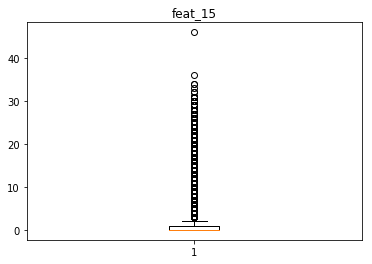

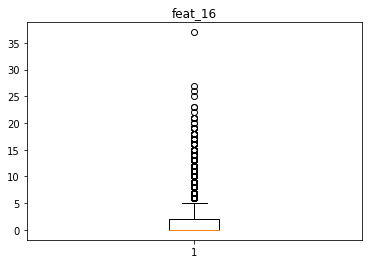

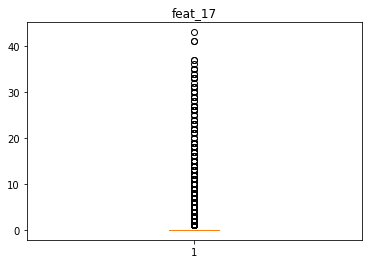

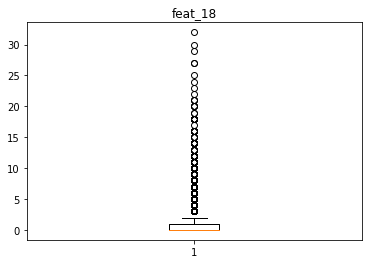

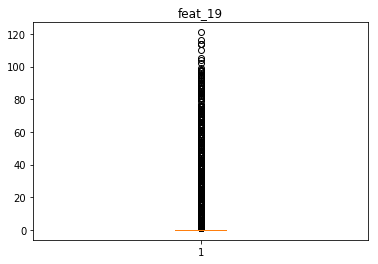

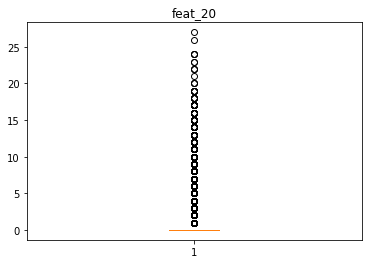

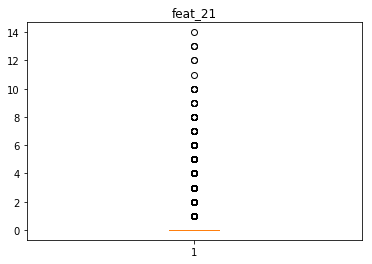

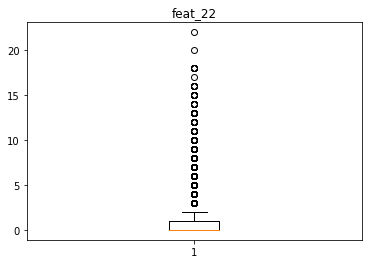

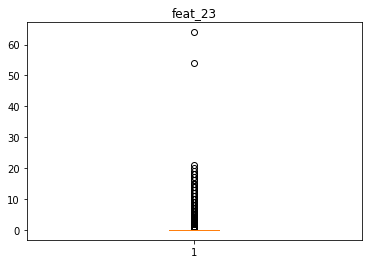

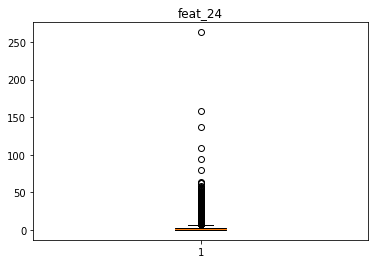

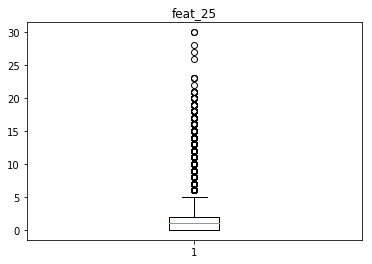

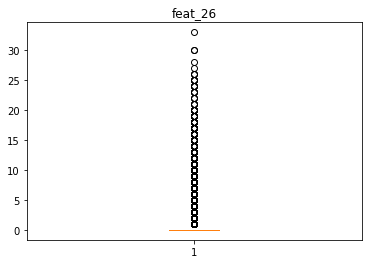

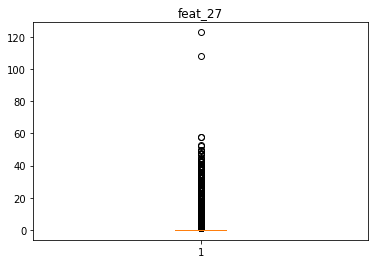

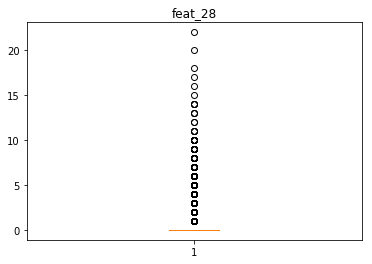

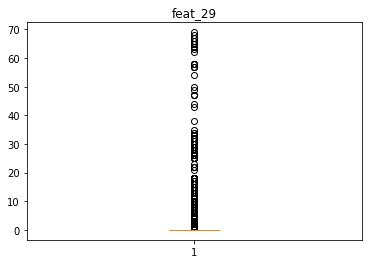

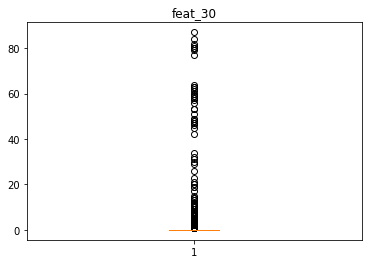

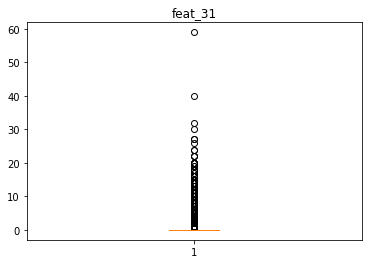

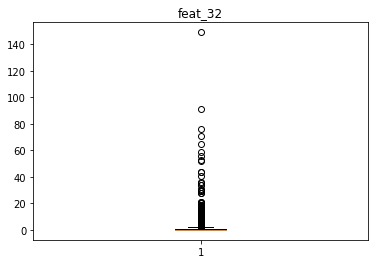

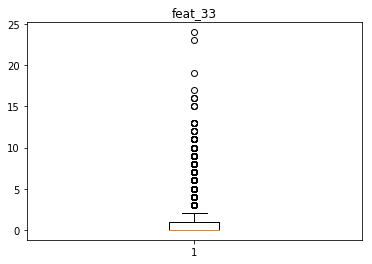

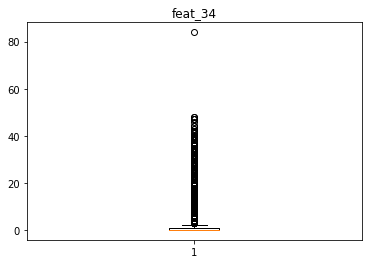

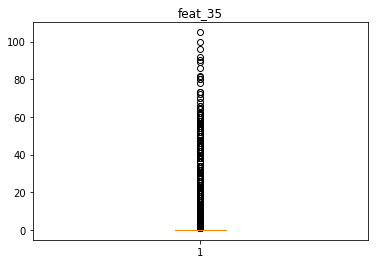

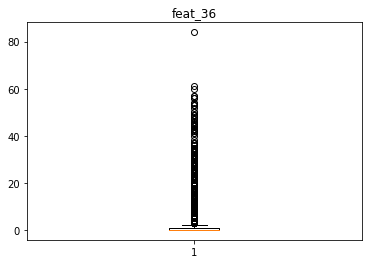

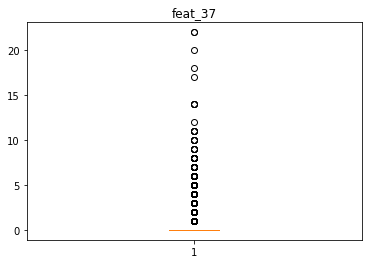

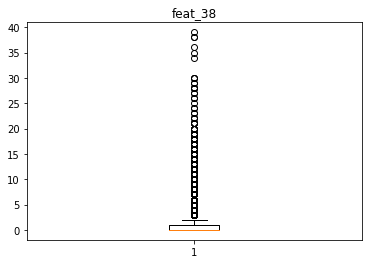

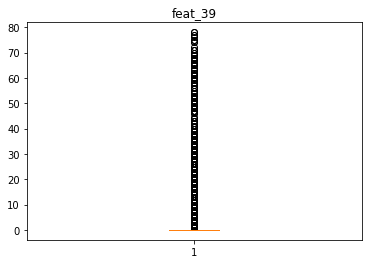

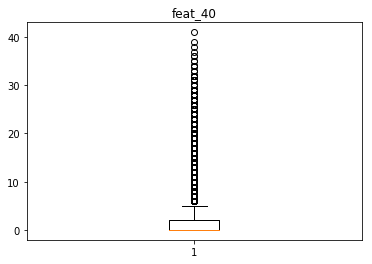

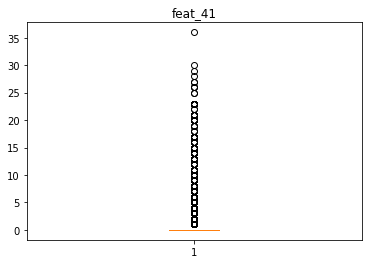

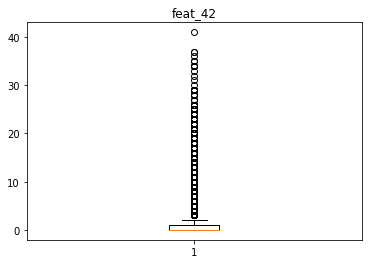

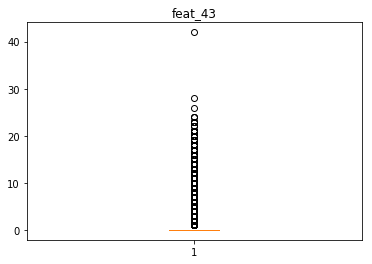

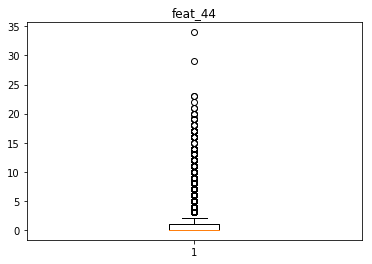

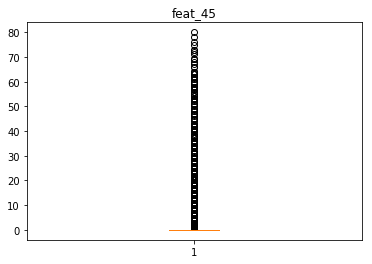

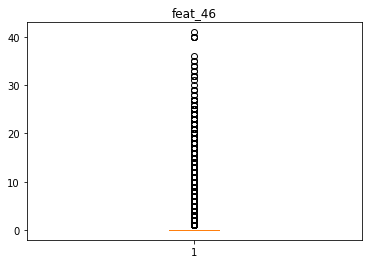

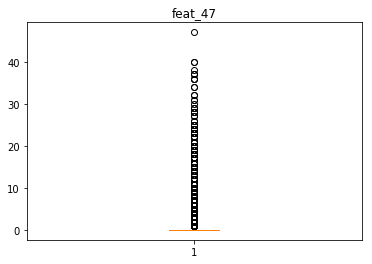

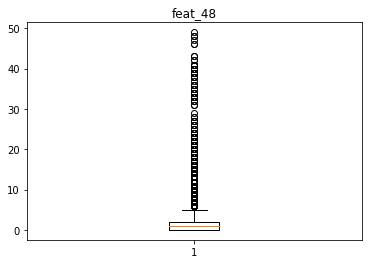

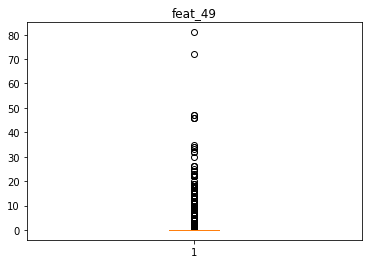

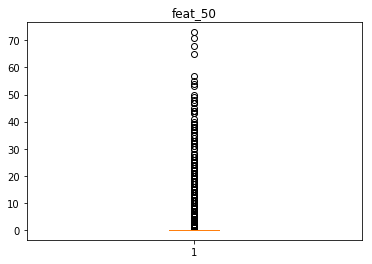

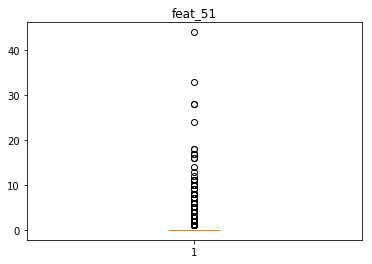

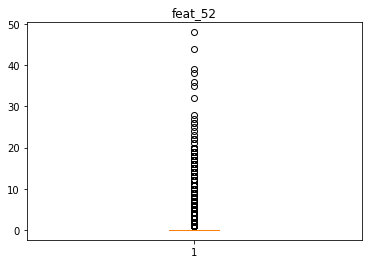

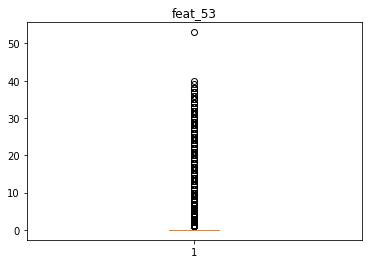

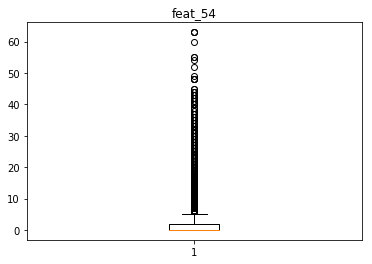

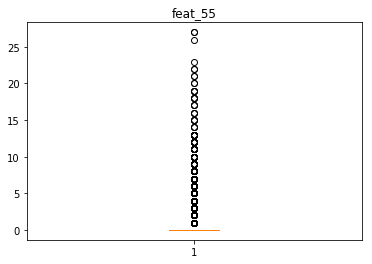

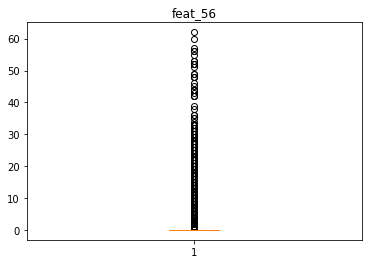

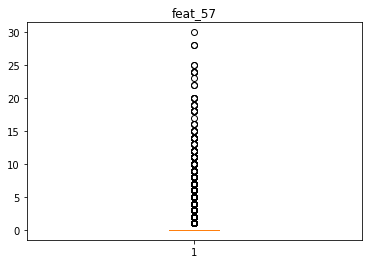

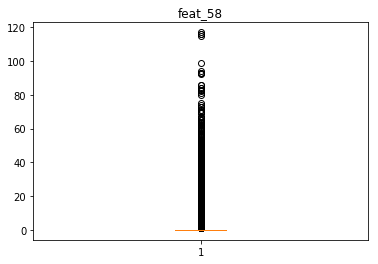

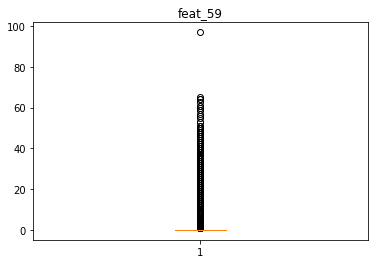

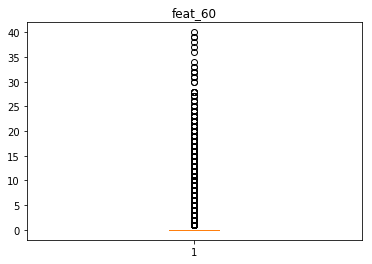

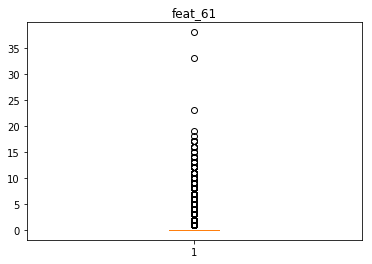

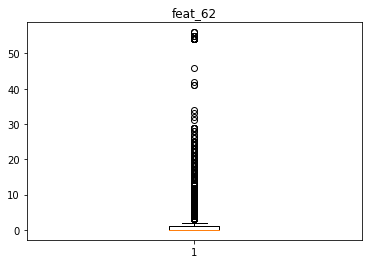

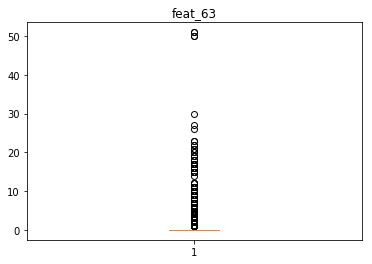

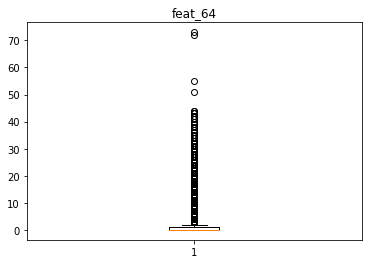

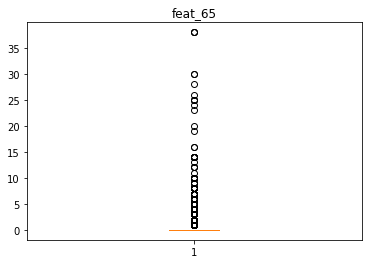

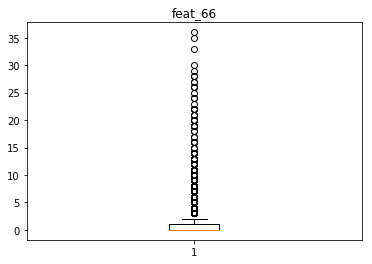

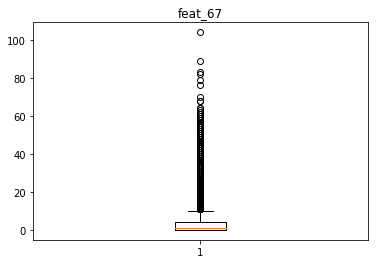

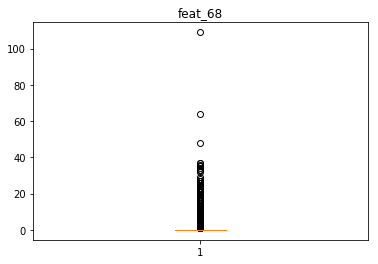

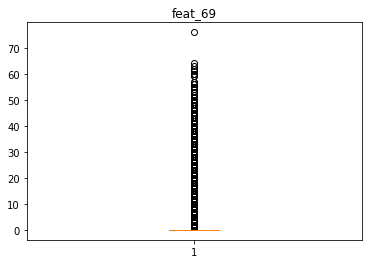

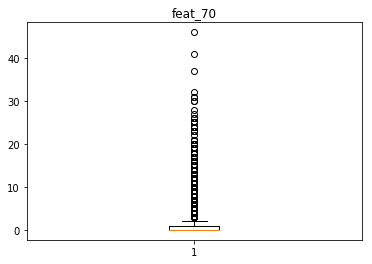

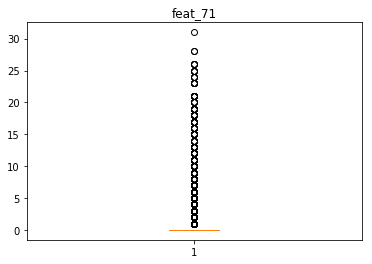

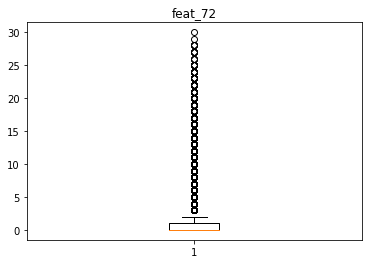

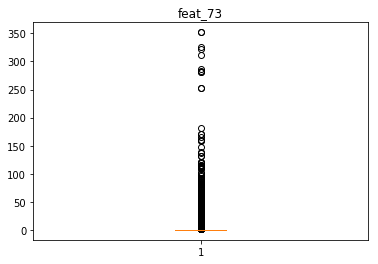

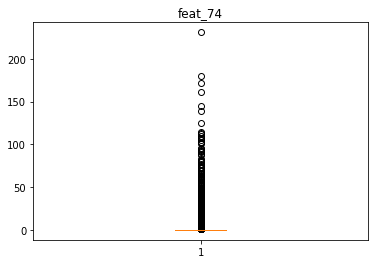

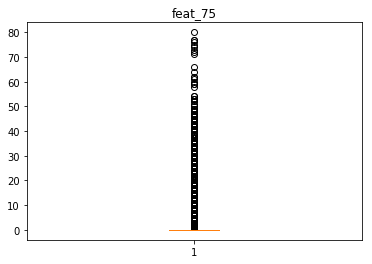

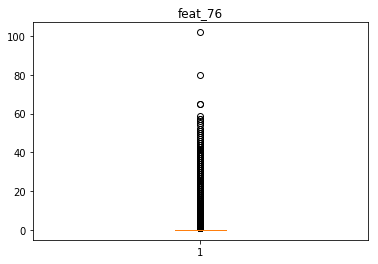

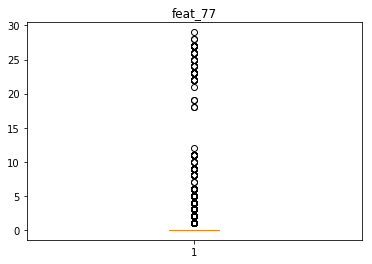

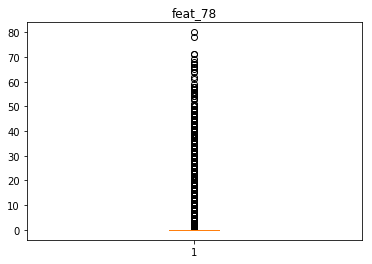

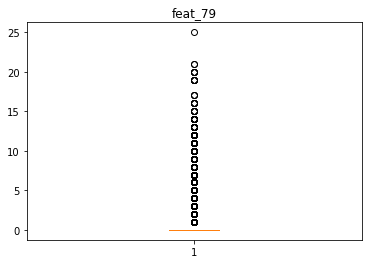

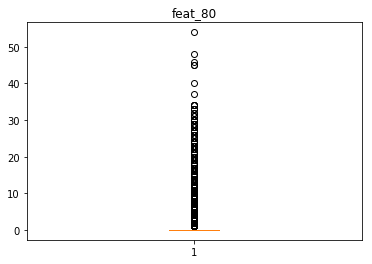

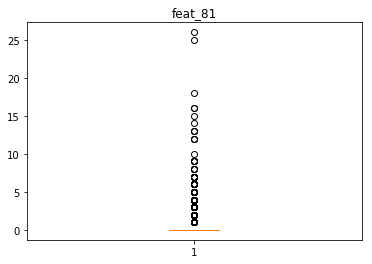

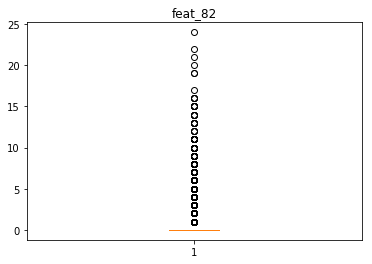

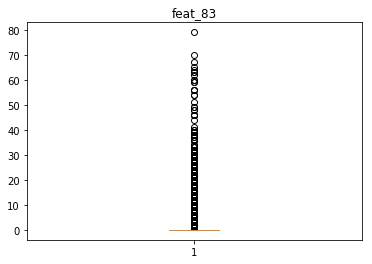

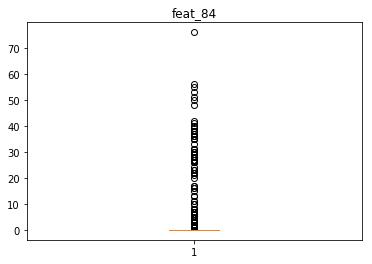

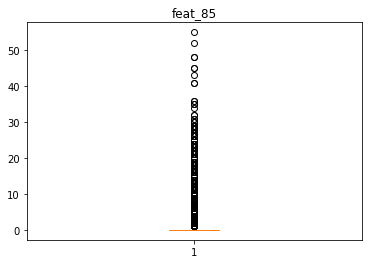

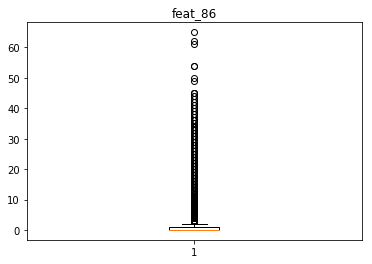

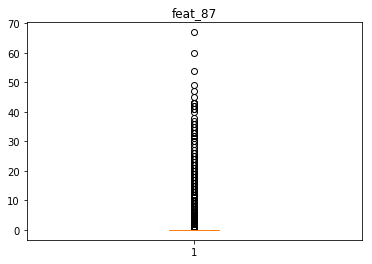

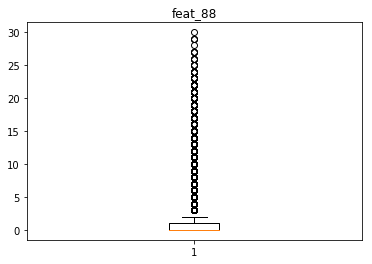

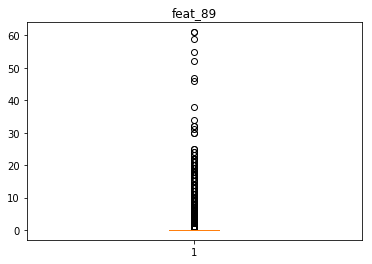

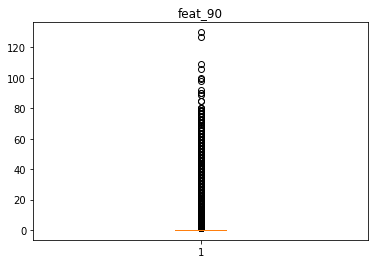

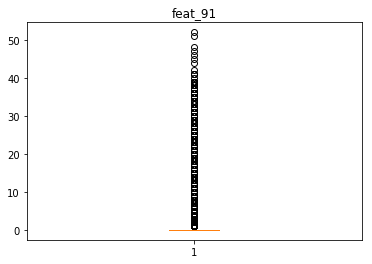

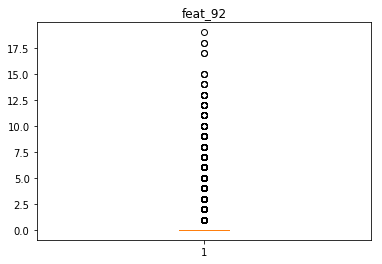

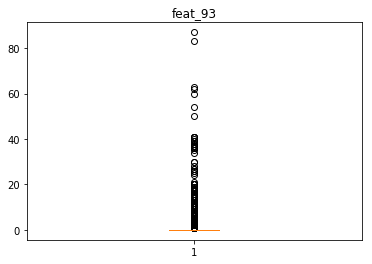

In [10]:
# Your code here
for x in df.columns[:-1]:
    plt.boxplot(df[x])
    plt.title(x)
    plt.show()

In [ ]:
# Your code here

In [ ]:
# Your code here

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

In [ ]:
# Your code here


Because the data is zero-inflated the boxplots look as shown above. Because there are this many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. More-over, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [ ]:
# Your code here

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a heatmap.

In [11]:
# Your code here
df.corr()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,1.000000,0.070691,0.185463,0.138980,1.460200e-01,0.030707,0.033410,0.136501,0.197418,-0.156082,...,-0.008192,-0.084507,-0.096484,0.097087,-0.215878,0.111519,0.188895,0.139078,0.131737,0.047944
feat_1,0.070691,1.000000,0.031332,-0.027807,-2.752941e-02,0.042973,0.043603,0.298952,0.056321,-0.032285,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.185463,0.031332,1.000000,0.082573,1.349870e-01,0.020926,0.041343,0.222386,0.019815,-0.025630,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,0.138980,-0.027807,0.082573,1.000000,5.835232e-01,0.010880,0.004288,0.001294,-0.053462,-0.063551,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,0.146020,-0.027529,0.134987,0.583523,1.000000e+00,0.017290,0.014059,0.014490,-0.046184,-0.046250,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
feat_5,0.030707,0.042973,0.020926,0.010880,1.729026e-02,1.000000,0.145355,0.075047,0.035861,-0.024708,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038
feat_6,0.033410,0.043603,0.041343,0.004288,1.405895e-02,0.145355,1.000000,0.088014,0.012867,-0.009373,...,0.177777,0.004290,0.010455,0.015256,-0.015437,0.035042,0.054034,0.012465,0.015479,0.008521
feat_7,0.136501,0.298952,0.222386,0.001294,1.448981e-02,0.075047,0.088014,1.000000,0.038121,-0.027146,...,0.062634,0.037874,-0.009169,0.089574,-0.033646,0.063511,0.129578,0.068506,-0.032261,0.034912
feat_8,0.197418,0.056321,0.019815,-0.053462,-4.618407e-02,0.035861,0.012867,0.038121,1.000000,-0.039281,...,0.005064,-0.003416,-0.029395,0.059929,-0.050931,0.007974,0.026807,0.095990,0.013608,0.005131
feat_9,-0.156082,-0.032285,-0.025630,-0.063551,-4.624977e-02,-0.024708,-0.009373,-0.027146,-0.039281,1.000000,...,-0.013569,-0.031462,-0.019144,-0.016925,0.001160,-0.019147,-0.020698,-0.014742,-0.069707,-0.006038


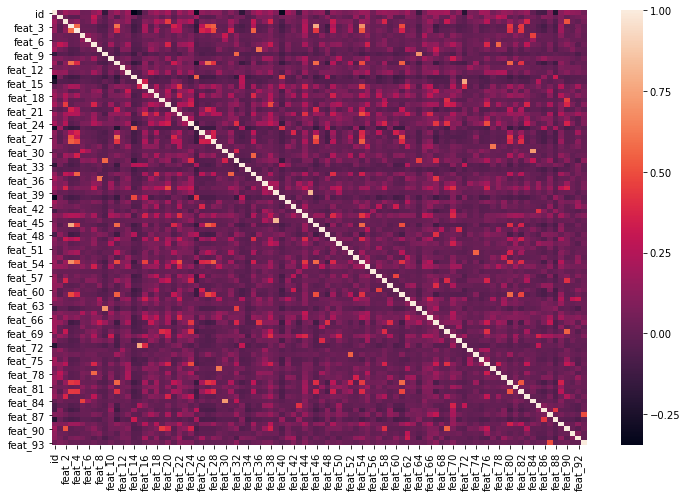

In [15]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

Use PCA to downscale your features. Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [16]:
# Your code here
from sklearn.decomposition import PCA

In [17]:
X = df.drop(['id', 'target'], axis=1)
y = df['target']

In [19]:
# Your code here
pca = PCA(n_components=50, random_state=1)
pca_trans = pca.fit_transform(X)

In [22]:
pca.explained_variance_ratio_

array([0.11772072, 0.08614549, 0.06388206, 0.06128698, 0.04409239,
       0.03969941, 0.03489138, 0.03150064, 0.02938002, 0.02746162,
       0.02593253, 0.02225107, 0.02161839, 0.01970549, 0.01922543,
       0.01860701, 0.01751872, 0.01705397, 0.01549944, 0.01413898,
       0.0124438 , 0.0118255 , 0.01070233, 0.01016369, 0.01000719,
       0.00928323, 0.0086002 , 0.00826417, 0.00812373, 0.00750495,
       0.00744151, 0.0070322 , 0.00693979, 0.00674132, 0.00658207,
       0.00626014, 0.00607041, 0.00596033, 0.00568613, 0.00547806,
       0.00523593, 0.00495786, 0.0048092 , 0.00469523, 0.00448844,
       0.00403915, 0.00387358, 0.00384147, 0.00364259, 0.00340028])

In [23]:
pca.explained_variance_ratio_.cumsum()

array([0.11772072, 0.20386621, 0.26774827, 0.32903525, 0.37312763,
       0.41282705, 0.44771843, 0.47921907, 0.50859908, 0.53606071,
       0.56199323, 0.5842443 , 0.6058627 , 0.62556819, 0.64479361,
       0.66340063, 0.68091934, 0.69797331, 0.71347275, 0.72761173,
       0.74005554, 0.75188104, 0.76258336, 0.77274705, 0.78275424,
       0.79203747, 0.80063767, 0.80890184, 0.81702557, 0.82453052,
       0.83197202, 0.83900422, 0.84594401, 0.85268533, 0.8592674 ,
       0.86552754, 0.87159795, 0.87755828, 0.88324442, 0.88872248,
       0.8939584 , 0.89891626, 0.90372545, 0.90842068, 0.91290912,
       0.91694827, 0.92082186, 0.92466332, 0.92830591, 0.93170619])

In [26]:
pca = PCA(n_components=27, random_state=1)
pca_trans = pca.fit_transform(X)
pca.explained_variance_ratio_.cumsum()

array([0.11772072, 0.20386621, 0.26774827, 0.32903525, 0.37312763,
       0.41282705, 0.44771842, 0.47921905, 0.50859905, 0.53606065,
       0.56199316, 0.58424419, 0.60586248, 0.62556793, 0.64479307,
       0.66339998, 0.68091806, 0.69797085, 0.71346779, 0.72760604,
       0.74003239, 0.75185338, 0.76254519, 0.77269564, 0.78265994,
       0.79190437, 0.80048694])

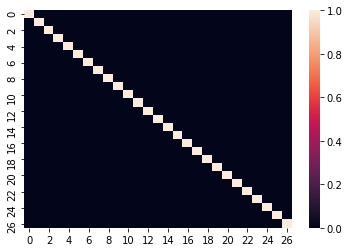

In [29]:
sns.heatmap(pd.DataFrame(pca_trans).corr())

## Create a train test split with a test size of 40%

This is a relatively big training set. Feel free to make it smaller (down to ~20%), but for an initial run you can try smaller training sets so the computation time is more manageable.

For now, simply use the original data and not the principal components. We looked at the PC's first to get a sense of our correlation structure, and to see how we can downsize our data without losing too much information. In what's next, you'll make PCA part of the pipeline!!

In [30]:
# Your code here
from sklearn.model_selection import train_test_split

In [31]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline
- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be the building a basic logistic regression model.

Make sure to fit the model using the training set, and test the result by obtaining the accuracy using the test set.

In [33]:
# Your code here
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [36]:
# Your code here
pipe = Pipeline([('pca', PCA(n_components=27, random_state=1)), ('clf', LogisticRegression())])

In [37]:
# Your code here
pipe.fit(X_train, y_train)


C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=27, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [38]:
pipe.score(X_train, y_train)

0.7222162365996876

In [39]:
pipe.score(X_test, y_test)

0.7158613445378151

## Create a pipeline consisting of a linear SVM, a simple Decision Tree and a simple Random Forest Classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SCM
- One for a default decision tree
- One for a RandomForestClassifier

In [40]:
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
svc = SVC()
rand_for = RandomForestClassifier()
dec_tree = DecisionTreeClassifier()

In [42]:
pipe_ran_for = Pipeline([('pca', PCA(n_components=27, random_state=1)), ('rand_for', RandomForestClassifier())])

In [43]:
pipe_ran_for.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=27, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)), ('rand_for', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
         ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [44]:
pipe_ran_for.score(X_train, y_train)

0.9836502720465442

In [45]:
pipe_ran_for.score(X_test, y_test)

0.7429298642533937

In [46]:
pipe_svc = Pipeline([('pca', PCA(n_components=27, random_state=1)), ('svc', SVC())])

In [47]:
pipe_svc.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=27, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [48]:
pipe_svc.score(X_train, y_train)

0.8521521305823412

In [49]:
pipe_svc.score(X_test, y_test)

0.7440610859728507

In [50]:
pipe_dec_tree = Pipeline([('pca', PCA(n_components=27, random_state=1)), ('dec_tree', DecisionTreeClassifier())])

In [51]:
pipe_dec_tree.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=27, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)), ('dec_tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [52]:
pipe_dec_tree.score(X_train, y_train)

0.9722297042503906

In [53]:
pipe_dec_tree.score(X_test, y_test)

0.6646331609566903

In [ ]:
# Your code here
# ⏰ This cell may take several minutes to run

## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the adaboost algorithm 

As extra, level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [54]:
from sklearn.model_selection import GridSearchCV

### Random Forest pipeline with grid search

In [55]:
pipe_ran_for = Pipeline([('pca', PCA(n_components=27, random_state=1)), ('rand_for', RandomForestClassifier())])

In [56]:
param_grid = [{'rand_for__n_estimators' : [10, 20, 30, 40], 
               'rand_for__max_depth' : [3, 6, 8],
               'rand_for__min_samples_split' : [.05, .1, .3]}]

In [59]:
grd_src = GridSearchCV(pipe_ran_for, param_grid=param_grid, scoring='accuracy', cv=3)
grd_src.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=27, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)), ('rand_for', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
         ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'rand_for__n_estimators': [10, 20, 30, 40], 'rand_for__max_depth': [3, 6, 8], 'rand_for__min_samples_split': [0.05, 0.1, 0.3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [65]:
grd_src.score(X_train, y_train)

0.6755104239616442

In [66]:
grd_src.score(X_test, y_test)

0.670814479638009

In [67]:
grd_src.cv_results_

C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\luigi\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.44815906, 0.73405806, 1.01197092, 1.2533497 , 0.46841311,
        0.72339853, 0.96742336, 1.24934594, 0.43020368, 0.61703857,
        0.79656434, 1.01230462, 0.62867387, 1.04856873, 1.4887081 ,
        1.92119686, 0.57450048, 0.96545911, 1.35606194, 1.74469471,
        0.43487183, 0.65459013, 0.89230569, 1.12965067, 0.71543288,
        1.19102049, 1.66556684, 2.15061045, 0.58844662, 0.97741262,
        1.37368298, 1.77693566, 0.41058381, 0.63731138, 0.87287744,
        1.08876483]),
 'std_fit_time': array([0.00693817, 0.0231758 , 0.00093244, 0.01032322, 0.02089387,
        0.02402355, 0.02261732, 0.00799937, 0.02206495, 0.00620478,
        0.0089525 , 0.02687002, 0.00791995, 0.00692056, 0.01245496,
        0.01186275, 0.00570562, 0.01467394, 0.04513946, 0.06126918,
        0.01976046, 0.02117894, 0.02159341, 0.05139357, 0.02599432,
        0.01434725, 0.02196252, 0.02400144, 0.01600511, 0.01716162,
        0.02179962, 0.02254458, 0.00402978, 0.01446006, 0.013

In [ ]:
# Your code here
# ⏰ This cell may take a long time to run!


Use your grid search object along with `.cv_results` to get the full result overview

In [ ]:
# Your code here 

### Adaboost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
adaboost = AdaBoostClassifier()

In [72]:
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

In [73]:
pipe_ada = Pipeline([('pca', PCA(n_components=27, random_state=1)), ('adaboost', AdaBoostClassifier())])

In [75]:
pipe_ab = Pipeline([('pca', PCA(n_components=27)),
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_ab.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   3.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   3.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   3.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   5.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   5.8s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   5.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   7.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   7.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__n_estimators': [30, 50, 70], 'clf__learning_rate': [1.0, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [76]:
# Best accuracy
print('Best accuracy: %.3f' % gs_ab.best_score_)

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Best accuracy: 0.674

Best params:
 {'clf__learning_rate': 0.5, 'clf__n_estimators': 70}


In [78]:
# Your code here 
gs_ab.cv_results_

{'mean_fit_time': array([3.42084503, 5.59205731, 7.86596465, 3.46545132, 5.77654123,
        7.76987147, 3.49036161, 5.50561198, 8.17160161]),
 'std_fit_time': array([0.01150511, 0.12637609, 0.05946848, 0.07934186, 0.04725165,
        0.09755351, 0.03808992, 0.00448531, 0.16932737]),
 'mean_score_time': array([0.06548007, 0.09739033, 0.12731441, 0.06879409, 0.11467107,
        0.12630002, 0.06378587, 0.09304555, 0.15821369]),
 'std_score_time': array([0.00187261, 0.00403914, 0.00235885, 0.00569999, 0.01845727,
        0.00801116, 0.00162354, 0.00047286, 0.00872815]),
 'param_clf__learning_rate': masked_array(data=[1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_clf__n_estimators': masked_array(data=[30, 50, 70, 30, 50, 70, 30, 50, 70],
              mask=[False, False, False, False, False, False, False, False,
                

## Note

Note that this solution is only one of many options. The results in the Random Forest and Adaboost models show that there is a lot of improvement possible tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You now got a lot of practice in. What algorithm would you choose and why?